# Bike Sharing Assignment

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a 
healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   **1. Which variables are significant in predicting the demand for shared bikes.**
   
   **2. How well those variables describe the bike demands**

**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing Relevant Libraries

In [3205]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3206]:
#Library importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Understanding Data

In [3207]:
# Reading Data
bike=pd.read_csv("day.csv")

In [3208]:
#Checking head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3209]:
# Checking no. of rows and columns
bike.shape

(730, 16)

In [3210]:
# information about Dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3211]:
#Description about dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Checking Missing values

In [3212]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### > No missing values

In [3213]:
#Droppinng some of redundant variables
bike = bike.drop(columns=['dteday','instant','casual','registered'])
# 'dteday' represent the data present in 'yr' & 'month'
# 'instant' is just represent index
# 'casual' & 'registered' both represent the variable 'cnt'(target variable)

In [3214]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [3215]:
#converting some of the numerical varaibles to categorical variables
#'mnth''season''weathersit''weekday'

bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


## Encoding the labels & Visualization

In [3216]:
#Replacing Numerical values with Labels
season_var = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}
mnth_var = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}
weekday_var = { 
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}
weathersit_var = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'Heavy Rain/Snow'
}

bike['season'] = bike['season'].replace(season_var)
bike['mnth'] = bike['mnth'].replace(mnth_var)
bike['weekday'] = bike['weekday'].replace(weekday_var)
bike['weathersit'] = bike['weathersit'].replace(weathersit_var)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


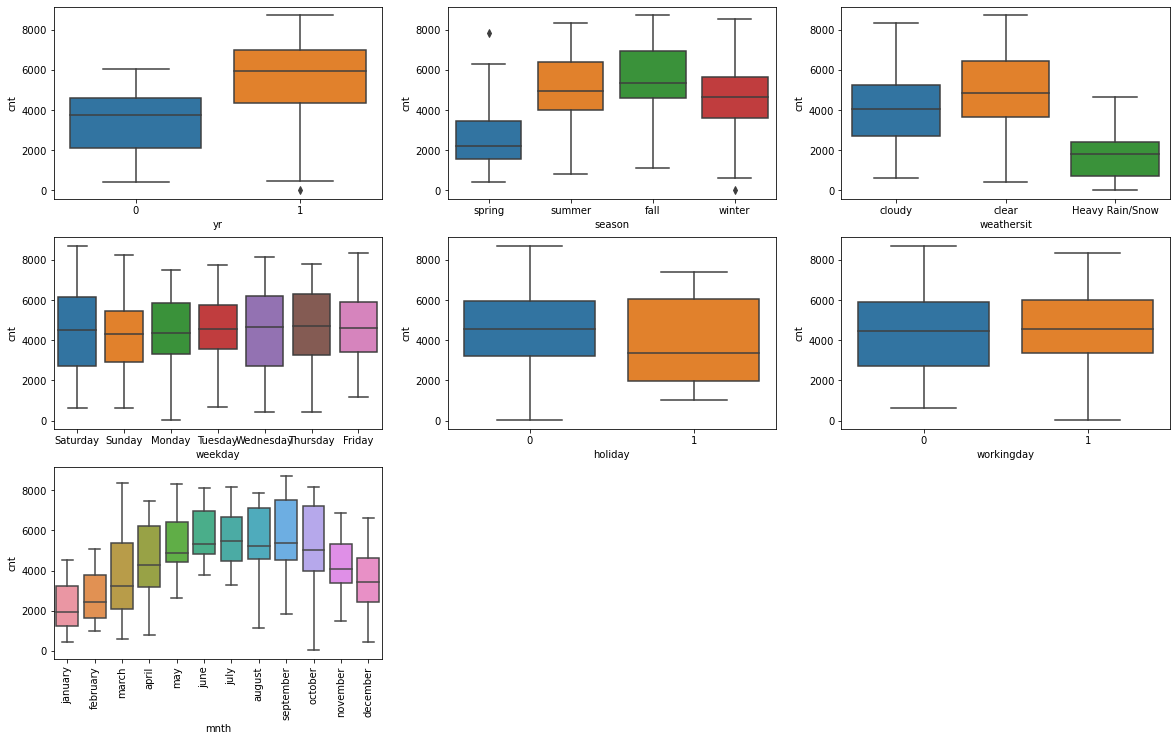

In [3217]:
#visualizing the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
a=sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
a.set_xticklabels(a.get_xticklabels(), rotation=90)

plt.show()

### Analysis
**From above graphs:**

(a) We have an outlier in Spring for season vs cnt(count of total rental bikes).

(b) In weathersit vs cnt, we see that Heavy Rain/Snow has the lowest cnt value.while, clear weather has the highest value for cnt(count of total rental bikes).

(c) From Weekdays, We see that there is very less variablilty across those. Wednesday and Saturday has the highest variability than others for cnt(count of total rental bikes).

(d) We see a good variability in cnt(count of total rental bikes) on holidays as compared to workinng days.

(e) From Month Plot, We can say that September has the highest cnt(count of total rental bikes). This is followed by August, October, June.

In [3218]:
#Removing Outliers for spring
bike = bike.drop(index = bike[(bike['season'] == 'spring') & (bike['cnt'] > 7500)].index)

## Visualising the Relationship Among Variables

### Visualising the numerical variables

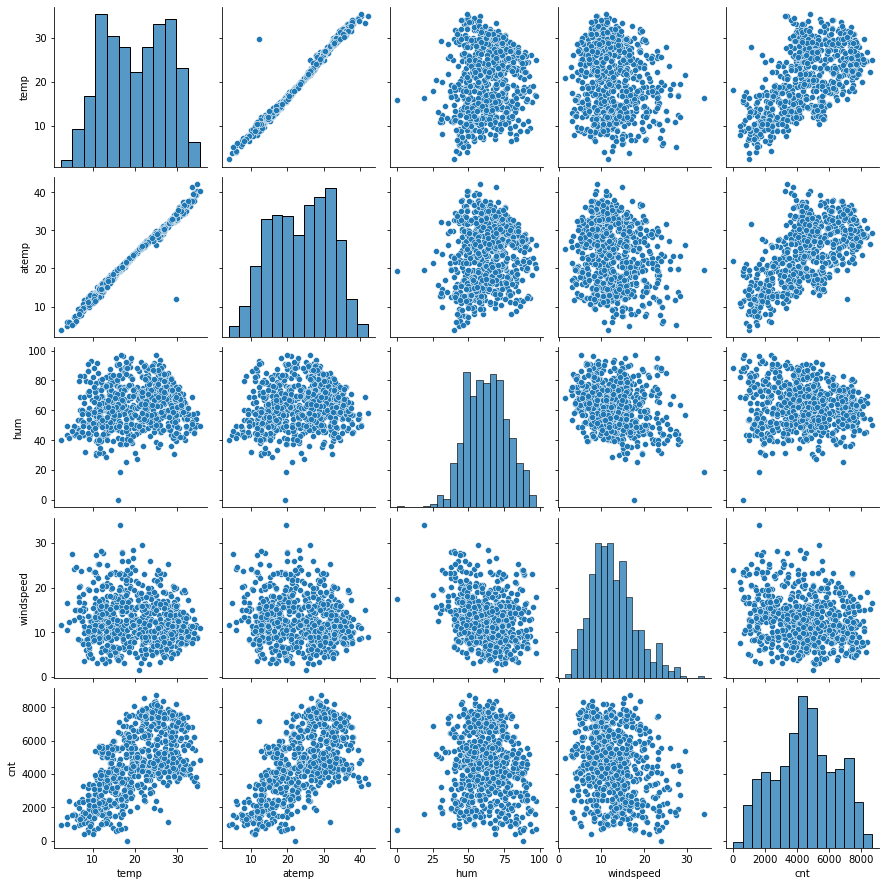

In [3219]:
bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]=bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].apply(pd.to_numeric)
cont_var=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike[cont_var])
plt.show()

#### Interpretations from above 
1. Variable 'temp'-'atemp' seems to have a strong linear relationship with each other and target variable - 'cnt'.
2. Variable 'windspeed' and 'hum'(humidity) does not have any strong relationship with target variable - 'cnt'

### Visualizing the categorical variables


In [3220]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [3221]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    object 
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    object 
 3   holiday     729 non-null    int64  
 4   weekday     729 non-null    object 
 5   workingday  729 non-null    int64  
 6   weathersit  729 non-null    object 
 7   temp        729 non-null    float64
 8   atemp       729 non-null    float64
 9   hum         729 non-null    float64
 10  windspeed   729 non-null    float64
 11  cnt         729 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.2+ KB


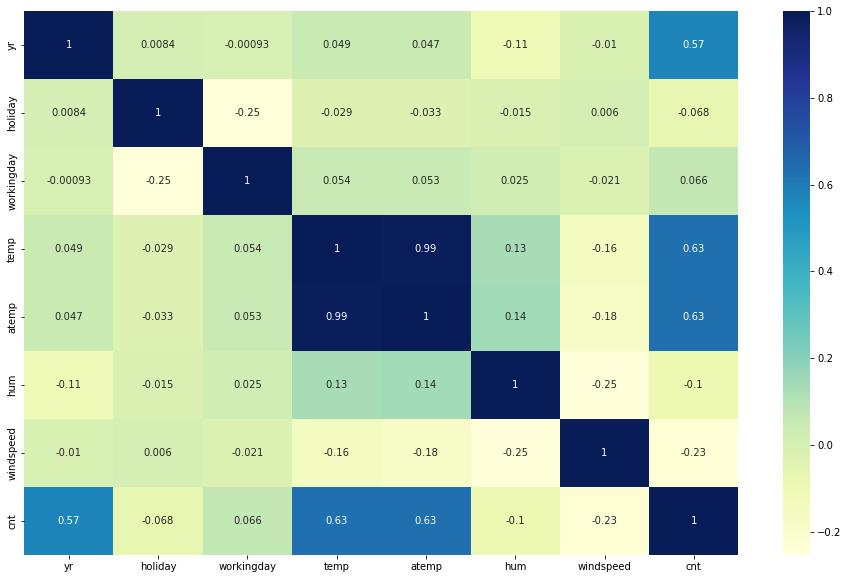

In [3222]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3223]:
#there are strong correlation between temp and atemp.which is almost 0.99.
#We need to drop it.
bike.drop(['atemp'], axis=1, inplace = True)

## Creating Dummy Variables for Categorical Variables



In [3224]:
#creating dummy variable for categorical data
#drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.
weather_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)
month_dummy = pd.get_dummies(bike['mnth'], drop_first = True)
season_dummy = pd.get_dummies(bike['season'], drop_first = True)
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)
month_dummy.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [3225]:
bike = pd.concat([bike, weather_dummy], axis = 1)
bike = pd.concat([bike, month_dummy], axis = 1)
bike = pd.concat([bike, season_dummy], axis = 1)
bike = pd.concat([bike, weekday_dummy], axis = 1)

In [3226]:
#Dropping the categorical variable as they hav been dummy-encoded
bike.drop(['weathersit'], axis = 1, inplace = True)
bike.drop(['mnth'], axis = 1, inplace = True)
bike.drop(['season'], axis = 1, inplace = True)
bike.drop(['weekday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,cloudy,august,...,september,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [3227]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          729 non-null    int64  
 1   holiday     729 non-null    int64  
 2   workingday  729 non-null    int64  
 3   temp        729 non-null    float64
 4   hum         729 non-null    float64
 5   windspeed   729 non-null    float64
 6   cnt         729 non-null    int64  
 7   clear       729 non-null    uint8  
 8   cloudy      729 non-null    uint8  
 9   august      729 non-null    uint8  
 10  december    729 non-null    uint8  
 11  february    729 non-null    uint8  
 12  january     729 non-null    uint8  
 13  july        729 non-null    uint8  
 14  june        729 non-null    uint8  
 15  march       729 non-null    uint8  
 16  may         729 non-null    uint8  
 17  november    729 non-null    uint8  
 18  october     729 non-null    uint8  
 19  september   729 non-null    u

## Splitting data into Training and Testing  Sets

In [3228]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

In [3229]:
from sklearn.preprocessing import MinMaxScaler

In [3230]:
scaler = MinMaxScaler()

In [3231]:
num_vars = ['windspeed', 'hum', 'temp', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


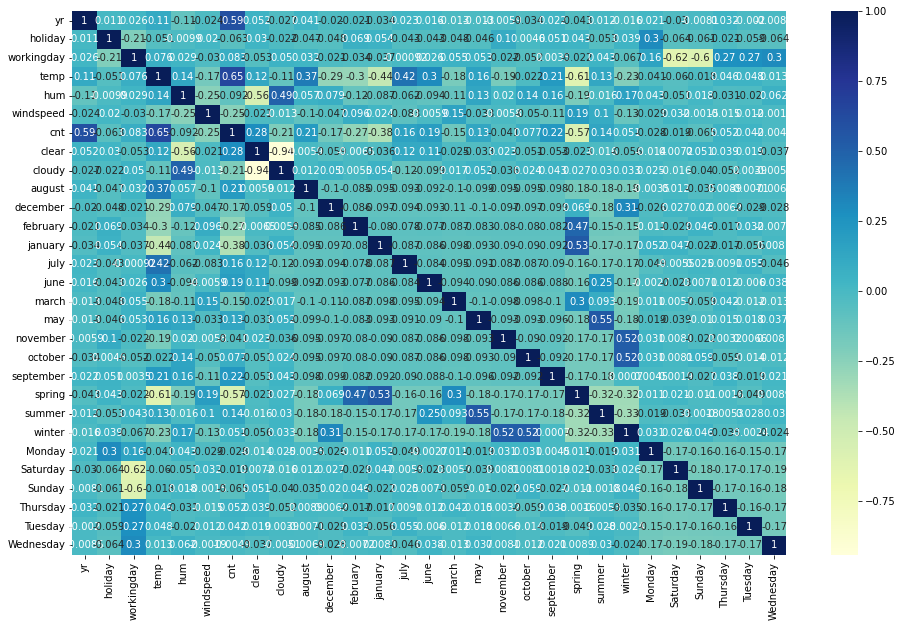

In [3232]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to be correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

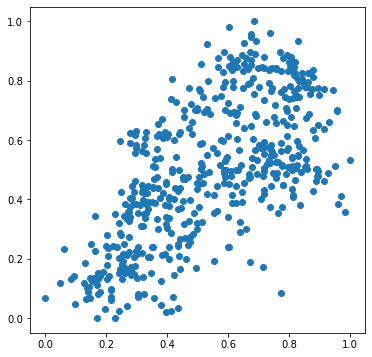

In [3233]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

In [3234]:
#Dividing into X and Y sets for the  model building
y_train = df_train.pop('cnt') #except cnt. bcoz, cnt is the dependent variable
X_train = df_train

## Building a Linear Model

### RFE
Recursive Feature Elimination

In [3235]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3236]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [3237]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('clear', True, 1),
 ('cloudy', True, 1),
 ('august', False, 10),
 ('december', False, 3),
 ('february', False, 5),
 ('january', False, 4),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 14),
 ('may', True, 1),
 ('november', False, 2),
 ('october', False, 9),
 ('september', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12)]

In [3238]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'clear',
       'cloudy', 'july', 'may', 'september', 'spring', 'winter', 'Saturday',
       'Sunday'],
      dtype='object')

In [3239]:
X_train.columns[~rfe.support_]

Index(['august', 'december', 'february', 'january', 'june', 'march',
       'november', 'october', 'summer', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

## Building Model using statsmodel, for detailed statistics

In [3240]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [3241]:
#Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [3242]:
lm = sm.OLS(y_train, X_train_rfe).fit() 

In [3243]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.27e-197
Time:                        14:29:47   Log-Likelihood:                 503.21
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     495   BIC:                            -912.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0427      0.037      1.138      0.2

In [3244]:
#Dropping variable 'Sunday' and 'workingday'as it has high p-value ( more than 0.05)
X_train_rfe1 = X_train_rfe.drop(['Sunday'], axis = 1)


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

In [3245]:
#Model No. 2
X_train_rfe02 = sm.add_constant(X_train_rfe1)
lm2 = sm.OLS(y_train, X_train_rfe02).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.27e-197
Time:                        14:29:47   Log-Likelihood:                 503.21
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     495   BIC:                            -912.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.048      0.855      0.3

In [3246]:
#Dropping 'holiday' as it has high p-value
X_train_rfe2 = X_train_rfe02.drop(['holiday'], axis = 1)


In [3247]:
#Model No. 3
X_train_rfe03 = sm.add_constant(X_train_rfe2)
lm3 = sm.OLS(y_train, X_train_rfe03).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.66e-198
Time:                        14:29:47   Log-Likelihood:                 502.01
No. Observations:                 510   AIC:                            -976.0
Df Residuals:                     496   BIC:                            -916.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0362      0.048      0.759      0.4

## Calculating VIF(Variance Inflation Factor)

In [3248]:
vif = pd.DataFrame()
XY = X_train_rfe03
vif['Features'] = XY.columns
vif['VIF'] = [variance_inflation_factor(XY.values,i) for i in range(XY.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,138.09
6,clear,10.92
7,cloudy,9.42
3,temp,3.04
11,spring,2.70
4,hum,1.95
12,winter,1.91
2,workingday,1.67
13,Saturday,1.65
8,july,1.36


In [3249]:
#Dropping 'clear' as it has high VIF value
X_train_rfe3 = X_train_rfe03.drop(['clear'], axis = 1)


In [3250]:
#Model No. 4
X_train_rfe04 = sm.add_constant(X_train_rfe3)
lm4 = sm.OLS(y_train, X_train_rfe04).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.14e-185
Time:                        14:29:47   Log-Likelihood:                 469.20
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     497   BIC:                            -857.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3276      0.034      9.585      0.0

In [3251]:
vif = pd.DataFrame()
XY = X_train_rfe04
vif['Features'] = XY.columns
vif['VIF'] = [variance_inflation_factor(XY.values,i) for i in range(XY.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,62.45
3,temp,2.98
10,spring,2.69
11,winter,1.90
2,workingday,1.66
4,hum,1.64
12,Saturday,1.64
6,cloudy,1.43
7,july,1.36
8,may,1.22


**Now we can say that Model-4 is the correct model for our Analysis as There is no Variable having p-value more than 0.05 and VIF greater than 5.**

In [3252]:
#Dropping 'const' as it has high VIF value
X_train_rfe4 = X_train_rfe04.drop(['const'], axis = 1)

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [3253]:
y_train_cnt = lm4.predict(X_train_rfe04)

In [3254]:
# Importing the required libraries
%matplotlib inline

Text(0.5, 0, 'Errors')

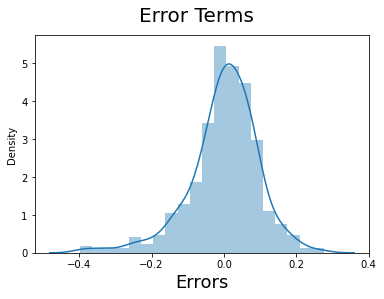

In [3255]:
residual = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

## Making Prediction
### Applying the scaling on the test sets

In [3256]:
# Scaling the test data
num_vars = ['windspeed', 'hum', 'temp', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [3257]:
y_test = df_test.pop('cnt')
X_test = df_test

In [3258]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [3259]:
print('y_test: ', y_test.shape)
print('X_test: ', X_test.shape)

y_test:  (219,)
X_test:  (219, 28)


In [3260]:
X_train_rfe3.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'cloudy',
       'july', 'may', 'september', 'spring', 'winter', 'Saturday'],
      dtype='object')

In [3261]:
# Making Prediction
y_pred = lm4.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

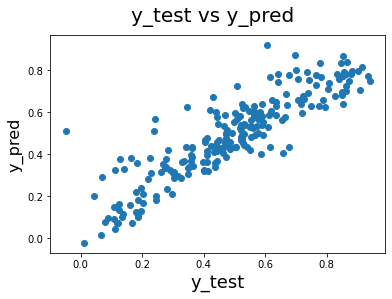

In [3262]:

#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   


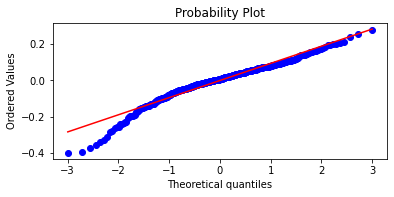

In [3263]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [3264]:
np.mean(residual)

5.572339975067146e-16

In [3265]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3266]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10511342231461067

In [3267]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.78


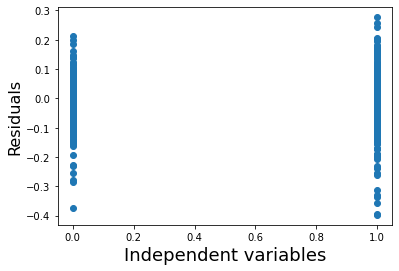

In [3268]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
X_t=X_train_rfe4.iloc[:,0].values
plt.figure()
plt.scatter(X_t,residual)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [3269]:
#Calculate the r square for test
r2_score(y_test, y_pred)

0.7782665782345456

We have taken 15 features for RFE (Recursive Feature Elimination). Then, Selection is done Manually. Where, We checked for multicollinearity and statistical significance of the features. 12 features have been interpreted to define the demand of the model.

We can see that the equation of our best fitted line is :

`cnt` = 0.2403 x `yr` + 0.0422 x `workingday` + 0.5449 x `temp` -0.3256 x `hum` - 0.2015 x `windspeed` - 0.0324 x `cloudy` - 0.0838 x `july` + 0.0591 x `may` + 0.0681 x `september` - 0.1009 x `spring` + 0.0753 x `winter` + 0.0492 x `Saturday`


## Conclusion

From the above Analysis, We conclude that:

Ques: Which variables are significant in predicting the demand for shared bikes ?

Observations:
1. The Variables `temp`, `yr`, `weather(cloudy)`, `season(winter, spring)`, `month(september, may, july)`, `day(Saturday)`, `workingday`, `windspeed`, `hum` will be significant to have an impact on demand for shared bikes.

2. Temperature will  play a significant role in demand of shared bike.

3. There are some features having negative coefficient, those features will decrease the demand for shared bike.

4. Year 2019 shows great demand than 2018, so we can say that  upcoming year will have increase in demand. So  they should follow the same patterns followed in 2019.

5. Cloudy weather shows an decrease in demand of bike. 

6. September has an increase in demand followed by may. While, July shows decreasee in demand.

7. Winter will have an increase in demand. while, Spring will show decrease in demand.

8. Working days will be having increase in demand.
9. windspeed & humidity shows an negative effect on demand of shared bikes  

## Recommendation
It is recommended to give more importance to following variables for considering demand of shared bikes:
1. `yr`

2. `workingday`

3. `temp`

4. `hum`
4. `windspeed`
5. `cloudy`
6. `july`
7. `may`
8. `september`
9. `spring`
10. `winter`
11. `Saturday`